# Baseline for [DIBRD Challenge](https://www.aicrowd.com/challenges/aicrowd-blitz-may-2020/problems/dibrd) on AIcrowd
#### Author : Naman Goenka


## To open this notebook on Google Computing platform Colab, click below!


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/gist/aicrowd-bot/761175b71c995e5a44a0877daf9e0597)


## Download Necessary Packages

In [0]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install matplotlib

## Download dataset

The first step is to download out train test data. We will be training a classifier on the train data and make predictions on test data. We submit our predictions

In [0]:
!rm -rf data
!mkdir data
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/dibrd/v0.1/train.csv -O data/train.csv
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/dibrd/v0.1/test.csv -O data/test.csv

--2020-05-15 12:22:12--  https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/dibrd/v0.1/train.csv
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.12, 130.117.252.13, 130.117.252.16, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116826 (114K) [text/csv]
Saving to: ‘data/train.csv’

data/train.csv      100%[===================>] 114.09K   352KB/s    in 0.3s    

2020-05-15 12:22:13 (352 KB/s) - ‘data/train.csv’ saved [116826/116826]

--2020-05-15 12:22:15--  https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/dibrd/v0.1/test.csv
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.12, 130.117.252.13, 130.117.252.10, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.12|:443... connected.
HTTP request sent, awaitin


## Import packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score


from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from keras.layers import Dense, Input, Dropout , InputLayer
from keras import Sequential



## Load Train Data
We use pandas library to load our data. Pandas loads them into dataframes which helps us analyze our data easily. Learn more about it [here](https://www.tutorialspoint.com/python_data_science/python_pandas.htm)

In [0]:
train_data_path = "data/train.csv" #path where data is stored

In [0]:
col_names = ['bn_ql', 'bn_prs', 'm_0.5','m_0.6','m_0.7','m_0.8','m_0.9','m_1.0',
             'nex.a','nex.b','nex.c','nex.d','nex.e','nex.f','nex.g','nex.h',
             'nrm_ed_ds','diam','bn_am/fm','label'
            ]
train_data = pd.read_csv(train_data_path,names=col_names,header=None) #load data in dataframe using pandas
print(len(col_names))
print(train_data.shape)

20
(920, 20)


## Load Test Set
Load the test data now# Load the evaluation data

In [0]:
final_test_path = "data/test.csv"
final_test = pd.read_csv(final_test_path,header=None,names = col_names[:-1])

## Visualise the Dataset

In [0]:
print(train_data.shape)
train_data.head()


(920, 20)


,bn_ql,bn_prs,m_0.5,m_0.6,m_0.7,m_0.8,m_0.9,m_1.0,nex.a,nex.b,nex.c,nex.d,nex.e,nex.f,nex.g,nex.h,nrm_ed_ds,diam,bn_am/fm,label
0,1,1,75,63,60,55,48,35,13.195493,4.396967,0.104070,0.000000,0.000000,0.000000,0.000000,0.000000,0.513092,0.123966,0,1
1,1,1,79,76,74,72,69,50,61.559348,28.959444,12.778104,2.045287,0.038016,0.000000,0.000000,0.000000,0.527993,0.101884,0,1
2,1,1,41,41,40,40,38,35,6.090116,0.834492,0.027460,0.000000,0.000000,0.000000,0.000000,0.000000,0.506881,0.091535,1,0
3,1,1,17,16,16,14,12,9,75.438535,20.352500,5.237412,0.206817,0.003884,0.000971,0.000971,0.000971,0.544614,0.089329,1,1
4,1,1,63,63,63,59,57,48,13.558211,5.366467,0.604079,0.051511,0.000000,0.000000,0.000000,0.000000,0.552941,0.112387,0,1


You can see the columns goes from 0 to 19, where columns from 0 to 18 represents features extracted from the image set and last column represents the type of patient i.e 1 if if signs of Diabetic Retinopathy is present else 0.

In [0]:
print(final_test.shape)
final_test.head()

(230, 19)


,bn_ql,bn_prs,m_0.5,m_0.6,m_0.7,m_0.8,m_0.9,m_1.0,nex.a,nex.b,nex.c,nex.d,nex.e,nex.f,nex.g,nex.h,nrm_ed_ds,diam,bn_am/fm
0,1,1,49,49,49,46,33,24,110.505328,36.711632,11.784233,2.122308,0.416480,0.044002,0.000000,0.000000,0.499970,0.093120,1
1,1,1,16,14,13,12,9,6,68.002805,13.919028,5.614372,1.196826,0.610773,0.306931,0.179215,0.086518,0.518665,0.093727,0
2,1,1,24,24,22,20,19,16,51.241067,19.732536,7.177703,0.441538,0.036385,0.006884,0.003934,0.002950,0.509862,0.092438,1
3,1,1,35,33,32,31,31,26,6.193941,1.625616,0.108061,0.000000,0.000000,0.000000,0.000000,0.000000,0.517101,0.084570,0
4,1,1,20,20,20,19,17,9,123.622304,34.630302,17.127238,3.043477,0.276494,0.070659,0.017409,0.013313,0.554011,0.121862,0


## Data Analysis

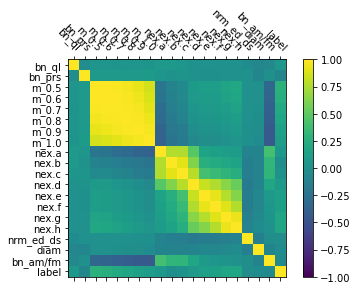

In [0]:
# Ref:- https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/
# and https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py
# Correction Matrix Plot

correlations = train_data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,20,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(col_names)
ax.set_yticklabels(col_names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=-45, ha="right",
         rotation_mode="anchor")


plt.show()

# Univariate Density Plots

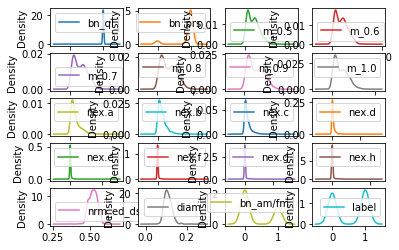

In [0]:
# Univariate Density Plots

train_data.plot(kind='density', subplots=True, layout=(5,4), sharex=False)
plt.show()
# 

In [0]:
#train_data final_test


y_train = train_data.iloc[:,-1] #values
# train_data.head()
train_data.drop(['label'], axis=1,inplace=True)

num_train = len(train_data)

df_all = pd.concat([train_data, final_test])

# Scaling features
scaler = RobustScaler()
df_all = scaler.fit_transform(df_all)


x_train    = pd.DataFrame(df_all[:num_train] , columns = col_names[:-1]) 
final_test = pd.DataFrame(df_all[num_train:] , columns = col_names[:-1]) 

print(x_train.shape)
print(y_train.shape)
print(final_test.shape)

x_train.head()





(920, 19)
(920,)
(230, 19)


,bn_ql,bn_prs,m_0.5,m_0.6,m_0.7,m_0.8,m_0.9,m_1.0,nex.a,nex.b,nex.c,nex.d,nex.e,nex.f,nex.g,nex.h,nrm_ed_ds,diam,bn_am/fm
0,0.0,0.0,1.025641,0.756757,0.777778,0.764706,0.71875,0.708333,-0.473352,-0.540210,-0.409905,-0.261301,-0.116049,-0.040270,0.000000,0.000000,-0.250585,0.727250,0.0
1,0.0,0.0,1.128205,1.108108,1.166667,1.264706,1.37500,1.333333,0.264237,0.510662,0.793344,0.847606,0.081577,-0.040270,0.000000,0.000000,0.114685,-0.198775,0.0
2,0.0,0.0,0.153846,0.162162,0.222222,0.323529,0.40625,0.708333,-0.581715,-0.692625,-0.417178,-0.261301,-0.116049,-0.040270,0.000000,0.000000,-0.402836,-0.632769,1.0
3,0.0,0.0,-0.461538,-0.513514,-0.444444,-0.441176,-0.40625,-0.375000,0.475907,0.142426,0.077445,-0.149170,-0.095858,-0.015051,0.200869,0.252191,0.522117,-0.725279,1.0
4,0.0,0.0,0.717949,0.756757,0.861111,0.882353,1.00000,1.250000,-0.467820,-0.498731,-0.362435,-0.233373,-0.116049,-0.040270,0.000000,0.000000,0.726238,0.241676,0.0


## Split Data into Train and Validation
Now we want to see how well our classifier is performing, but we dont have the test data labels with us to check. What do we do ? So we split our dataset into train and validation. The idea is that we test our classifier on validation set in order to get an idea of how well our classifier works. This way we can also ensure that we dont [overfit](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/) on the train dataset. There are many ways to do validation like [k-fold](https://machinelearningmastery.com/k-fold-cross-validation/),[leave one out](https://en.wikipedia.org/wiki/Cross-validation_(statistics), etc

In [0]:
# X_train, X_val= train_test_split(train_data, test_size=0.2, random_state=42) 

Here we have selected the size of the testing data to be 20% of the total data. You can change it and see what effect it has on the accuracies. To learn more about the train_test_split function [click here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

Now, since we have our data splitted into train and validation sets, we need to get the label separated from the data.

In [0]:
# X_train,y_train = X_train.iloc[:,:-1],X_train.iloc[:,-1]
# X_val,y_val = X_val.iloc[:,:-1],X_val.iloc[:,-1]


## Define the Classifier
Now we come to the juicy part. We have fixed our data and now we train a classifier. The classifier will learn the function by looking at the inputs and corresponding outputs. There are a ton of classifiers to choose from some being [Logistic Regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc), [SVM](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47), [Random Forests](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47), [Decision Trees](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052), etc.   
Tip: A good model doesnt depend solely on the classifier but on the features(columns) you choose. So make sure to play with your data and keep only whats important. 

In [0]:
# classifier = LogisticRegression(solver = 'lbfgs',multi_class='auto',max_iter=50)

We have used [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression) as a classifier here and set few of the parameteres. But one can set more parameters and increase the performance. To see the list of parameters visit [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

We can also use other classifiers. To read more about sklean classifiers visit [here](https://scikit-learn.org/stable/supervised_learning.html). Try and use other classifiers to see how the performance of your model changes.

## Train the classifier

In [0]:
# classifier.fit(X_train, y_train)


Got a warning! Dont worry, its just beacuse the number of iteration is very less(defined in the classifier in the above cell).Increase the number of iterations and see if the warning vanishes and also see how the performance changes.Do remember increasing iterations also increases the running time.( Hint: max_iter=500)

## Predict on Validation
Now we predict our trained classifier on the validation set and evaluate our model# Predict on test set

In [0]:
# y_pred = classifier.predict(X_val)

### Feature Selection

In [0]:

# lsvc = LinearSVC(C=0.05, penalty="l1", dual=False, max_iter = 1000).fit(x_train, y_train)
# model = SelectFromModel(lsvc, prefit=True)
# x_train_new = model.transform(x_train)
# final_test_new = model.transform(final_test)


# feature_idx  = model.get_support()
# feature_name = x_train.columns[feature_idx]

# x_train_new.shape
# final_test_new.shape


In [0]:
# x_train_new    = pd.DataFrame(x_train_new   , columns = feature_name) 
# final_test_new = pd.DataFrame(final_test_new, columns = feature_name)
# x_train_new.head()

### ## TUNING batch size and epochs

In [0]:
# def create_model(dense_layer_sizes= [], optimizer="adam", dropout=0.1, init='uniform', nbr_features=19):#dense_nparams=10):
#     model = Sequential()
#     model.add(InputLayer(input_shape=(nbr_features,),))

#     hid_lay = 1
#     if not type(dense_layer_sizes) == type( (0,1) ): 
#       dense_layer_sizes = (dense_layer_sizes,)
#     # for error TypeError: 'int' object is not iterable


#     for layer_size in dense_layer_sizes:
#         if hid_lay == 1:
#           model.add(Dense(layer_size, activation='relu',  kernel_initializer=init,)) 
#           model.add(Dropout(dropout), )
#           hid_lay+=1
#         else:
#           model.add(Dense(layer_size, activation='relu'))
#           model.add(Dropout(dropout), )
#           hid_lay+=1
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=["accuracy","mae"])
#     return model




def create_model():
    model = Sequential()
    model.add(Dense(8,input_dim = 19,kernel_initializer = 'uniform',activation = 'relu'))
    # model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 8,kernel_initializer =  'uniform',activation = 'relu'))
    # model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    opt = Adam(learning_rate=0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics = ['accuracy','mae'])
    return model


# def build_model_fn(neurons=20, noise=0.25):
#     model = Sequential()
#     model.add(InputLayer(input_shape=(train.shape[1],)))
#     model.add(GaussianNoise(noise))
#     model.add(Dense(neurons, activation='tanh'))
#     model.add(Dense(1, activation='linear'))
#     model.compile(loss='mean_squared_error', optimizer='nadam', metrics=[r2_keras])
#     return model

kears_estimator = KerasClassifier(build_fn=create_model, verbose=1)

cnf = Pipeline([ 
                # ('feature_selection', SelectFromModel(LinearSVC(C=0.07, penalty="l1", dual=False, max_iter = 1000))),
                     
                       ("kc", kears_estimator),
                ])

# define the grid search parameters
param_grid = {
    # 'kc__dense_layer_sizes' : [ (12), (12,4),(8),(8,4),(10),(10,4) ],
    'kc__epochs': [10,50,100, ],
    # 'kc__dense_nparams': [12, 8, 10],
    # 'kc__init': [ 'uniform', 'zeros', 'normal', ], 
    'kc__batch_size':[2, 16, 32, 46 , 64],
    # 'kc__optimizer':['RMSprop', 'Adam', 'Adamax', 'sgd'],
    # 'kc__dropout': [0.5, 0.4, 0.3, 0.2, 0.1, 0]
}

kfold_splits = 5
grid = GridSearchCV(estimator=cnf,  
                    n_jobs=-1, 
                    verbose=10,
                    return_train_score=True,
                    cv=kfold_splits,  
                    param_grid=param_grid,
                    scoring = 'f1',
                  )


### Using Grid search

In [0]:
grid_result = grid.fit(x_train, y_train) #callbacks=[tbCallBack]

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for test_mean, test_stdev, train_mean, train_stdev, param in zip(
        grid_result.cv_results_['mean_test_score'],
        grid_result.cv_results_['std_test_score'],
        grid_result.cv_results_['mean_train_score'],
        grid_result.cv_results_['std_train_score'],
        grid_result.cv_results_['params']):
    print("Train: %f (%f) // Test : %f (%f) with: %r" % (train_mean, train_stdev, test_mean, test_stdev, param))
 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.1min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 

Epoch 1/100
920/920 [==============================] - 0s 184us/step - loss: 0.6593 - accuracy: 0.5826 - mae: 0.4692
Epoch 2/100
920/920 [==============================] - 0s 70us/step - loss: 0.6290 - accuracy: 0.6435 - mae: 0.4452
Epoch 3/100
920/920 [==============================] - 0s 67us/step - loss: 0.6079 - accuracy: 0.6761 - mae: 0.4240
Epoch 4/100
920/920 [==============================] - 0s 68us/step - loss: 0.5976 - accuracy: 0.7065 - mae: 0.4135
Epoch 5/100
920/920 [==============================] - 0s 66us/step - loss: 0.5791 - accuracy: 0.7065 - mae: 0.4021
Epoch 6/100
920/920 [==============================] - 0s 78us/step - loss: 0.5696 - accuracy: 0.7098 - mae: 0.3953
Epoch 7/100
920/920 [==============================] - 0s 66us/step - loss: 0.5694 - accuracy: 0.7239 - mae: 0.3836
Epoch 8/100
920/920 [==============================] - 0s 70us/step - loss: 0.5522 - accuracy: 0.7228 - mae: 0.3823
Epoch 9/100
920/920 [==============================] - 0s 68us/step - l

### Tuning no of neurons in first and second hidden layer

In [0]:
def create_model_1(neuron1 = 8 , neuron2= 4):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 19,kernel_initializer = 'uniform' ,activation = 'relu'))
    
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer =  'uniform' ,activation = 'relu'))
    
    model.add(Dense(1,activation = 'sigmoid'))
    
    opt = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics = ['accuracy','mae'])
    return model


kears_estimator = KerasClassifier(build_fn=create_model_1, verbose=1, batch_size=16 , epochs = 100)

cnf = Pipeline([ 
                # ('feature_selection', SelectFromModel(LinearSVC(C=0.07, penalty="l1", dual=False, max_iter = 1000))),
                     
                       ("kc", kears_estimator),
                ])

# define the grid search parameters
param_grid_1 = {
    # 'kc__dense_layer_sizes' : [ (12), (12,4),(8),(8,4),(10),(10,4) ],
    # 'kc__epochs': [10,50,100, ],
    # 'kc__dense_nparams': [12, 8, 10],
    # 'kc__init': [ 'uniform', 'zeros', 'normal', ],
    # 'kc__activation' : ['softmax','relu','tanh','linear',], 
    # 'kc__batch_size':[2, 16, 32, 64],
    # 'kc__optimizer':['RMSprop', 'Adam', 'Adamax', 'sgd'],
    # 'kc__dropout': [ 0.3, 0.25, 0.2,0.05, 0.1, 0],
    # 'kc__learning_rate':[0.1,0.01,0.001,0.005],
    'kc__neuron1' : [12,10,8],
    'kc__neuron2' : [2,3,4,6],
}

kfold_splits = 5
grid = GridSearchCV(estimator=cnf,  
                    n_jobs=-1, 
                    verbose=10,
                    return_train_score=True,
                    cv=kfold_splits,  
                    param_grid=param_grid_1,
                    scoring = 'f1',
                  )


grid_result = grid.fit(x_train, y_train) #callbacks=[tbCallBack]

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for test_mean, test_stdev, train_mean, train_stdev, param in zip(
        grid_result.cv_results_['mean_test_score'],
        grid_result.cv_results_['std_test_score'],
        grid_result.cv_results_['mean_train_score'],
        grid_result.cv_results_['std_train_score'],
        grid_result.cv_results_['params']):
    print("Train: %f (%f) // Test : %f (%f) with: %r" % (train_mean, train_stdev, test_mean, test_stdev, param))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.0min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.0min finished


Epoch 1/100
920/920 [==============================] - 0s 190us/step - loss: 0.6638 - accuracy: 0.5304 - mae: 0.4804
Epoch 2/100
920/920 [==============================] - 0s 78us/step - loss: 0.6489 - accuracy: 0.5880 - mae: 0.4653
Epoch 3/100
920/920 [==============================] - 0s 74us/step - loss: 0.6428 - accuracy: 0.6043 - mae: 0.4611
Epoch 4/100
920/920 [==============================] - 0s 79us/step - loss: 0.6368 - accuracy: 0.6120 - mae: 0.4566
Epoch 5/100
920/920 [==============================] - 0s 78us/step - loss: 0.6303 - accuracy: 0.6283 - mae: 0.4526
Epoch 6/100
920/920 [==============================] - 0s 72us/step - loss: 0.6229 - accuracy: 0.6435 - mae: 0.4459
Epoch 7/100
920/920 [==============================] - 0s 67us/step - loss: 0.6156 - accuracy: 0.6467 - mae: 0.4405
Epoch 8/100
920/920 [==============================] - 0s 66us/step - loss: 0.6090 - accuracy: 0.6630 - mae: 0.4355
Epoch 9/100
920/920 [==============================] - 0s 66us/step - l

### Tuning learning rate and dropout rate 

In [0]:


def create_model_1(dropout=0.1 , learning_rate=0.01):
    model = Sequential()
    model.add(Dense(12,input_dim = 19,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout))
    model.add(Dense(4,input_dim = 12,kernel_initializer =  'uniform',activation = 'relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1,activation = 'sigmoid'))
    
    opt = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics = ['accuracy','mae'])
    return model


kears_estimator = KerasClassifier(build_fn=create_model_1, verbose=1, batch_size=16 , epochs = 100)

cnf = Pipeline([ 
                # ('feature_selection', SelectFromModel(LinearSVC(C=0.07, penalty="l1", dual=False, max_iter = 1000))),
                     
                       ("kc", kears_estimator),
                ])

# define the grid search parameters
param_grid_1 = {
    # 'kc__dense_layer_sizes' : [ (12), (12,4),(8),(8,4),(10),(10,4) ],
    # 'kc__epochs': [10,50,100, ],
    # 'kc__dense_nparams': [12, 8, 10],
    # 'kc__init': [ 'uniform', 'zeros', 'normal', ], 
    # 'kc__batch_size':[2, 16, 32, 64],
    # 'kc__optimizer':['RMSprop', 'Adam', 'Adamax', 'sgd'],
    'kc__dropout': [ 0.25, 0.2,0.15, 0.1,0.05, 0],
    'kc__learning_rate':[0.01,0.001,0.005,0.004],
}

kfold_splits = 5
grid = GridSearchCV(estimator=cnf,  
                    n_jobs=-1, 
                    verbose=10,
                    return_train_score=True,
                    cv=kfold_splits,  
                    param_grid=param_grid_1,
                    scoring = 'f1',
                  )


grid_result = grid.fit(x_train, y_train) #callbacks=[tbCallBack]

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for test_mean, test_stdev, train_mean, train_stdev, param in zip(
        grid_result.cv_results_['mean_test_score'],
        grid_result.cv_results_['std_test_score'],
        grid_result.cv_results_['mean_train_score'],
        grid_result.cv_results_['std_train_score'],
        grid_result.cv_results_['params']):
    print("Train: %f (%f) // Test : %f (%f) with: %r" % (train_mean, train_stdev, test_mean, test_stdev, param))
 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.0min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 

Epoch 1/100
920/920 [==============================] - 0s 161us/step - loss: 0.6520 - accuracy: 0.5609 - mae: 0.4647
Epoch 2/100
920/920 [==============================] - 0s 67us/step - loss: 0.6369 - accuracy: 0.6380 - mae: 0.4552
Epoch 3/100
920/920 [==============================] - 0s 68us/step - loss: 0.6296 - accuracy: 0.6359 - mae: 0.4463
Epoch 4/100
920/920 [==============================] - 0s 67us/step - loss: 0.6149 - accuracy: 0.6685 - mae: 0.4395
Epoch 5/100
920/920 [==============================] - 0s 68us/step - loss: 0.6015 - accuracy: 0.6685 - mae: 0.4253
Epoch 6/100
920/920 [==============================] - 0s 66us/step - loss: 0.5865 - accuracy: 0.6902 - mae: 0.4182
Epoch 7/100
920/920 [==============================] - 0s 66us/step - loss: 0.5847 - accuracy: 0.6967 - mae: 0.4134
Epoch 8/100
920/920 [==============================] - 0s 69us/step - loss: 0.5847 - accuracy: 0.6880 - mae: 0.4118
Epoch 9/100
920/920 [==============================] - 0s 68us/step - l

### Tuning Activation function and kernel initializer

In [0]:


def create_model_1(init='uniform',activation='relu'):
    model = Sequential()
    model.add(Dense(12,input_dim = 19,kernel_initializer = init ,activation = activation))
    # model.add(Dropout(0.05))
    model.add(Dense(4,input_dim = 12,kernel_initializer =  init ,activation = activation))
    # model.add(Dropout(0.05))
    model.add(Dense(1,activation = 'sigmoid'))
    
    opt = Adam(lr = 0.005)
    model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics = ['accuracy','mae'])
    return model


kears_estimator = KerasClassifier(build_fn=create_model_1, verbose=1, batch_size=16 , epochs = 100)

cnf = Pipeline([ 
                # ('feature_selection', SelectFromModel(LinearSVC(C=0.07, penalty="l1", dual=False, max_iter = 1000))),
                     
                       ("kc", kears_estimator),
                ])

# define the grid search parameters
param_grid_1 = {
    # 'kc__dense_layer_sizes' : [ (12), (12,4),(8),(8,4),(10),(10,4) ],
    # 'kc__epochs': [10,50,100, ],
    # 'kc__dense_nparams': [12, 8, 10],
    'kc__init': [ 'uniform', 'zeros', 'normal', 'glorot_uniform'],
    'kc__activation' : ['softmax','relu','tanh','linear',], 
    # 'kc__batch_size':[2, 16, 32, 64],
    # 'kc__optimizer':['RMSprop', 'Adam', 'Adamax', 'sgd'],
    # 'kc__dropout': [ 0.3, 0.25, 0.2,0.05, 0.1, 0],
    # 'kc__learning_rate':[0.1,0.01,0.001,0.005],
}

kfold_splits = 5
grid = GridSearchCV(estimator=cnf,  
                    n_jobs=-1, 
                    verbose=10,
                    return_train_score=True,
                    cv=kfold_splits,  
                    param_grid=param_grid_1,
                    scoring = 'f1',
                  )


grid_result = grid.fit(x_train, y_train) #callbacks=[tbCallBack]

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for test_mean, test_stdev, train_mean, train_stdev, param in zip(
        grid_result.cv_results_['mean_test_score'],
        grid_result.cv_results_['std_test_score'],
        grid_result.cv_results_['mean_train_score'],
        grid_result.cv_results_['std_train_score'],
        grid_result.cv_results_['params']):
    print("Train: %f (%f) // Test : %f (%f) with: %r" % (train_mean, train_stdev, test_mean, test_stdev, param))
 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   55.6s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 

Epoch 1/100
920/920 [==============================] - 0s 167us/step - loss: 0.6494 - accuracy: 0.5870 - mae: 0.4629
Epoch 2/100
920/920 [==============================] - 0s 73us/step - loss: 0.6176 - accuracy: 0.6467 - mae: 0.4314
Epoch 3/100
920/920 [==============================] - 0s 72us/step - loss: 0.6090 - accuracy: 0.6696 - mae: 0.4274
Epoch 4/100
920/920 [==============================] - 0s 68us/step - loss: 0.5941 - accuracy: 0.6728 - mae: 0.4148
Epoch 5/100
920/920 [==============================] - 0s 73us/step - loss: 0.5934 - accuracy: 0.6837 - mae: 0.4106
Epoch 6/100
920/920 [==============================] - 0s 71us/step - loss: 0.5885 - accuracy: 0.6815 - mae: 0.4084
Epoch 7/100
920/920 [==============================] - 0s 71us/step - loss: 0.5794 - accuracy: 0.6880 - mae: 0.3994
Epoch 8/100
920/920 [==============================] - 0s 73us/step - loss: 0.5732 - accuracy: 0.7065 - mae: 0.3934
Epoch 9/100
920/920 [==============================] - 0s 74us/step - l

### Train the best model with tuned hyperparameters
Neuron in first hidden layer = 12 (12)

---
Neuron in second hidden layer = 4 (3)

---
Activation function = tanh (tanh)

---
Initialization = uniform (normal)

---
Dropout = 0.00(0.05

---
Adam initial Learning Rate = 0.005(0.005)

---
Batch Size = 16    (46 (according training and validation test size))

---
Epoch = 100

---





In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
def create_model_1():# these hyperparameters were drived from tuning later on ......
    model = Sequential()
    model.add(Dense(12,input_dim = 19,kernel_initializer = 'uniform' ,activation = 'tanh'))
    model.add(Dropout(0.15))
    model.add(Dense(4,input_dim = 12,kernel_initializer =  'uniform' ,activation = 'tanh'))
    model.add(Dropout(0.15))
    model.add(Dense(1,activation = 'sigmoid'))
    
    opt = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics = ['accuracy','mae'])
    return model

best_model = create_model_1()
print(best_model.summary())

checkpoint = ModelCheckpoint(
    filepath="/tmp/model2.hdf5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    mode="min",
)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, restore_best_weights=True)                             # pat 25 false 0.1 10 0..005 0.4807
                                                                                                                                  # pat 20 true  0.12 10 0.004 0.4694
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.05 , patience= 5)                                                                                #  pat 20 true  0.13 10 0.003 0.483
                                                                                                                                  #              0.15 7  0.003 0.4798
history = best_model.fit(
          x_train, 
          y_train, 
          
          epochs=250,
          batch_size=16,
          validation_split=0.2,
         
          callbacks=[es,checkpoint,],
          )



Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 12)                240       
_________________________________________________________________
dropout_5 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 4)                 52        
_________________________________________________________________
dropout_6 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 5         
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________
None
Train on 736 samples, validate on 184 samples
Epoch 1/250
736/736 [==============================] - 0s 290us/step -

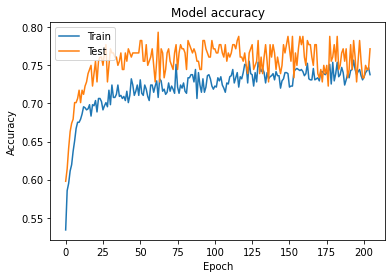

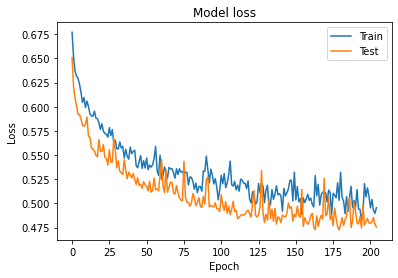

<Figure size 432x288 with 0 Axes>

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig('/tmp/accuracy_train_val_2.png')

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()
plt.savefig('/tmp/loss_train_val_2.png')





## Evaluate the Performance
We use the same metrics as that will be used for the test set.  
[F1 score](https://en.wikipedia.org/wiki/F1_score) are the metrics for this challenge

In [0]:
# precision = precision_score(y_val,y_pred,average='micro')
# recall = recall_score(y_val,y_pred,average='micro')
# accuracy = accuracy_score(y_val,y_pred)
# f1 = f1_score(y_val,y_pred,average='macro')

In [0]:
# print("Accuracy of the model is :" ,accuracy)
# print("Recall of the model is :" ,recall)
# print("Precision of the model is :" ,precision)
# print("F1 score of the model is :" ,f1)

# Prediction on Evaluation Set

## Predict Test Set
Time for the moment of truth! Predict on test set and time to make the submission.

In [0]:
# submission = classifier.predict(final_test)
best_model.load_weights('/tmp/model2.hdf5') #best model weights saved here
submission = best_model.predict_classes(final_test).flatten()

## Save the prediction to csv

Note: Do take a look at the submission format.The submission file should contain a header.For eg here it is "label". 

In [0]:
submission = pd.DataFrame(submission)

submission.to_csv('/tmp/submission.csv',header=['label'],index=False)

In [0]:
submission.head()

,0
0,0
1,1
2,0
3,1
4,0


## To download the generated csv in colab run the below command

In [0]:
# submission = classifier.predict(final_test)
# df_sub = pd.DataFrame({'ID': id_test, 'y': y_test})
from google.colab import files
files.download('/tmp/submission.csv') 



My final submission :- https://www.aicrowd.com/8299814dae2a

---
References:-


1.   https://medium.com/datadriveninvestor/hyperparameter-tuning-with-deep-learning-grid-search-8630aa45b2da
2.   https://www.kaggle.com/eikedehling/keras-nn-scaling-feature-selection-0-548/data
3.   https://medium.com/@am.benatmane/keras-hyperparameter-tuning-using-sklearn-pipelines-grid-search-with-cross-validation-ccfc74b0ce9f
4.   https://ai.stackexchange.com/questions/18206/what-kind-of-optimizer-is-suggested-to-use-for-binary-classification-of-similar


Future Improvement :--> SVM , Ensemble methods , Tuning all parameters together.



### Go to [platform](https://www.aicrowd.com/challenges/aicrowd-blitz-may-2020/problems/dibrd). Participate in the challenge and submit the submission.csv generated.